# **<span style="color:#FFD580;">UK Dataset: Exploratory Data Analysis</span>**

## **Purpose of Notebook**
Conducting a EDA analysis on the loaded and cleaned data, checking numerical stats, distributions, target analysis and geographical views

---

**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px


**Load Clean Dataset**

In [2]:
data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/UK/UK-cleaned_data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/UK/UK-cleaned_data.csv'

In [ ]:
# Print all column names in the dataset
print("All Columns in the Dataset:")
for col in data.columns:
    print(col)

All Columns in the Dataset:
Report ID
Report Version
Highest Injury Severity Alleged
Incident Date
Incident Time (24:00)
Roadway Type
Posted Speed Limit (MPH)
Lighting
Weather
Roadway Surface
SV Pre-Crash Movement
Crash With
hit_object_off_carriageway
SV Contact Area
City
state
Country
latitude
longitude
make
model
model_year


**Split the Numerical and Catergorical Columns**

In [ ]:
# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
catergorical_columns = ['Highest Injury Severity Alleged',  'Roadway Type', 'Lighting', 'Weather', 'Roadway Surface', 'SV Pre-Crash Movement', 'Crash With', 'hit_object_off_carriageway', 'SV Contact Area', 'City', 'state', 'Country', 'make', 'model','Report Version', 'Vehicle Type', 'Vehicle Use', 'Vehicle Model Year', 'Vehicle Color', 'Vehicle Body Type', 'Vehicle Configuration', 'Vehicle VIN', 'Vehicle License Plate State', 'Vehicle License Plate Number']
datetime_columns = ['Incident Date', 'Incident Time (24:00)']

# Print the identified columns
print(f"\nNumerical columns: {numerical_columns}")
print(f"\nCategorical columns: {catergorical_columns}")
print(f"\nDatetime columns: {datetime_columns}")



Numerical columns: ['Posted Speed Limit (MPH)', 'latitude', 'longitude', 'model_year']

Categorical columns: ['Highest Injury Severity Alleged', 'Roadway Type', 'Lighting', 'Weather', 'Roadway Surface', 'SV Pre-Crash Movement', 'Crash With', 'hit_object_off_carriageway', 'SV Contact Area', 'City', 'state', 'Country', 'make', 'model']

Datetime columns: ['Incident Date', 'Incident Time (24:00)']


## **<span style="color:lightblue;">Univariate Analysis</span>**

**Numerical Summary and Boxplots**

In [ ]:
# Create a summary table for numerical columns
summary_table = PrettyTable()
summary_table.field_names = ["Column", "Mean", "Median", "Mode", "Min", "Max", "Std Dev"]

for column in numerical_columns:
    col_data = data[column].dropna()  # Drop NaN values for calculations
    if not col_data.empty:  # Ensure the column is not empty
        mean = col_data.mean()
        median = col_data.median()
        mode = col_data.mode().iloc[0] if not col_data.mode().empty else "N/A"
        min_val = col_data.min()
        max_val = col_data.max()
        std_dev = col_data.std()
        summary_table.add_row([column, mean, median, mode, min_val, max_val, std_dev])
    else:
        summary_table.add_row([column, "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"])

print(summary_table)

+--------------------------+---------------------+-----------+--------+-----------+-----------+--------------------+
|          Column          |         Mean        |   Median  |  Mode  |    Min    |    Max    |      Std Dev       |
+--------------------------+---------------------+-----------+--------+-----------+-----------+--------------------+
| Posted Speed Limit (MPH) |  37.677748370021305 |    30.0   |  30.0  |    20.0   |    70.0   | 14.265782432330262 |
|         latitude         |  52.53163996196071  | 52.364531 |  -1.0  |    -1.0   | 60.541144 | 1.6137708961831496 |
|        longitude         | -1.4284806735093498 | -1.428278 |  -1.0  | -7.497375 |  1.756257 | 1.4002967554729497 |
|        model_year        |  2011.7986443741527 |   2012.0  | 2015.0 |   1900.0  |   2023.0  | 5.627098532067395  |
+--------------------------+---------------------+-----------+--------+-----------+-----------+--------------------+


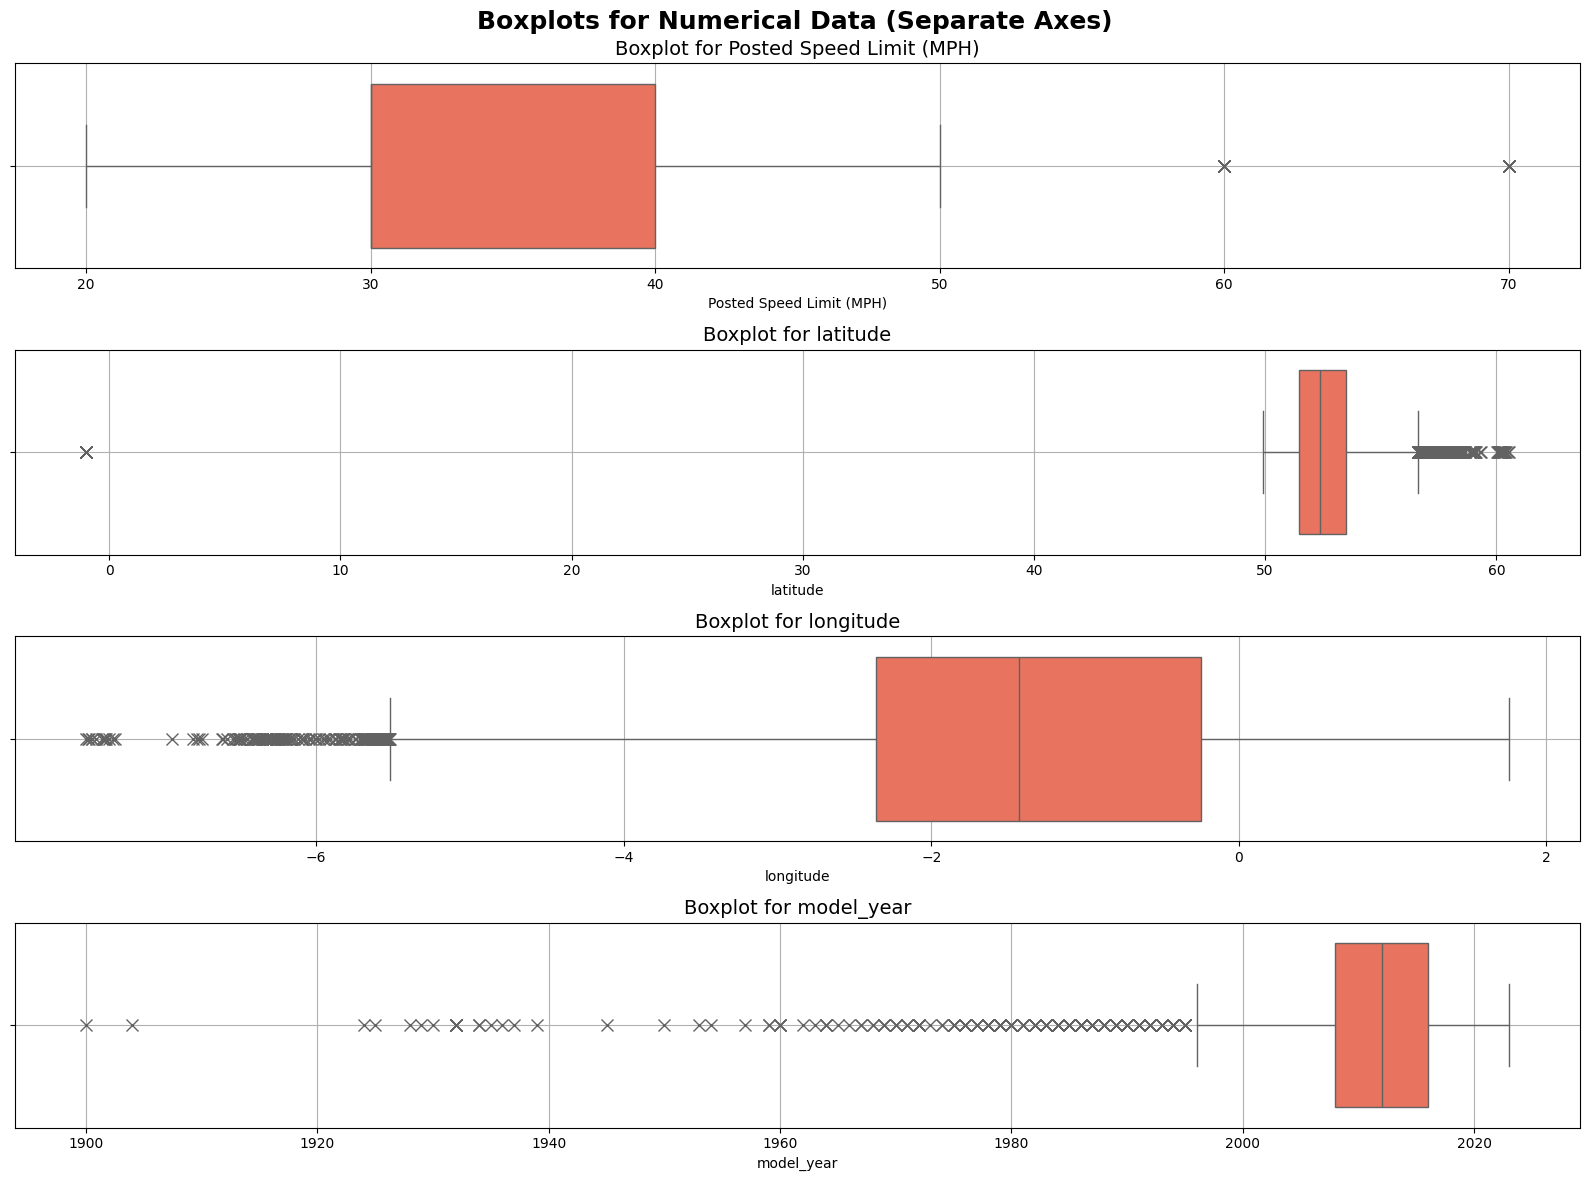

In [ ]:
# Numerical Data: Boxplots for each column separately
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12))  # Create a 2x2 grid for 4 numerical columns
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=col, color='tomato', ax=axes[i],
                flierprops=dict(marker='x', markersize=8))
    axes[i].set_title(f"Boxplot for {col}", fontsize=14)
    axes[i].grid(True)  # Add grid for better visualization

# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("Boxplots for Numerical Data (Separate Axes)", fontsize=18, fontweight=800)
plt.tight_layout()
plt.show()

**Catergorical Columns Barplots**

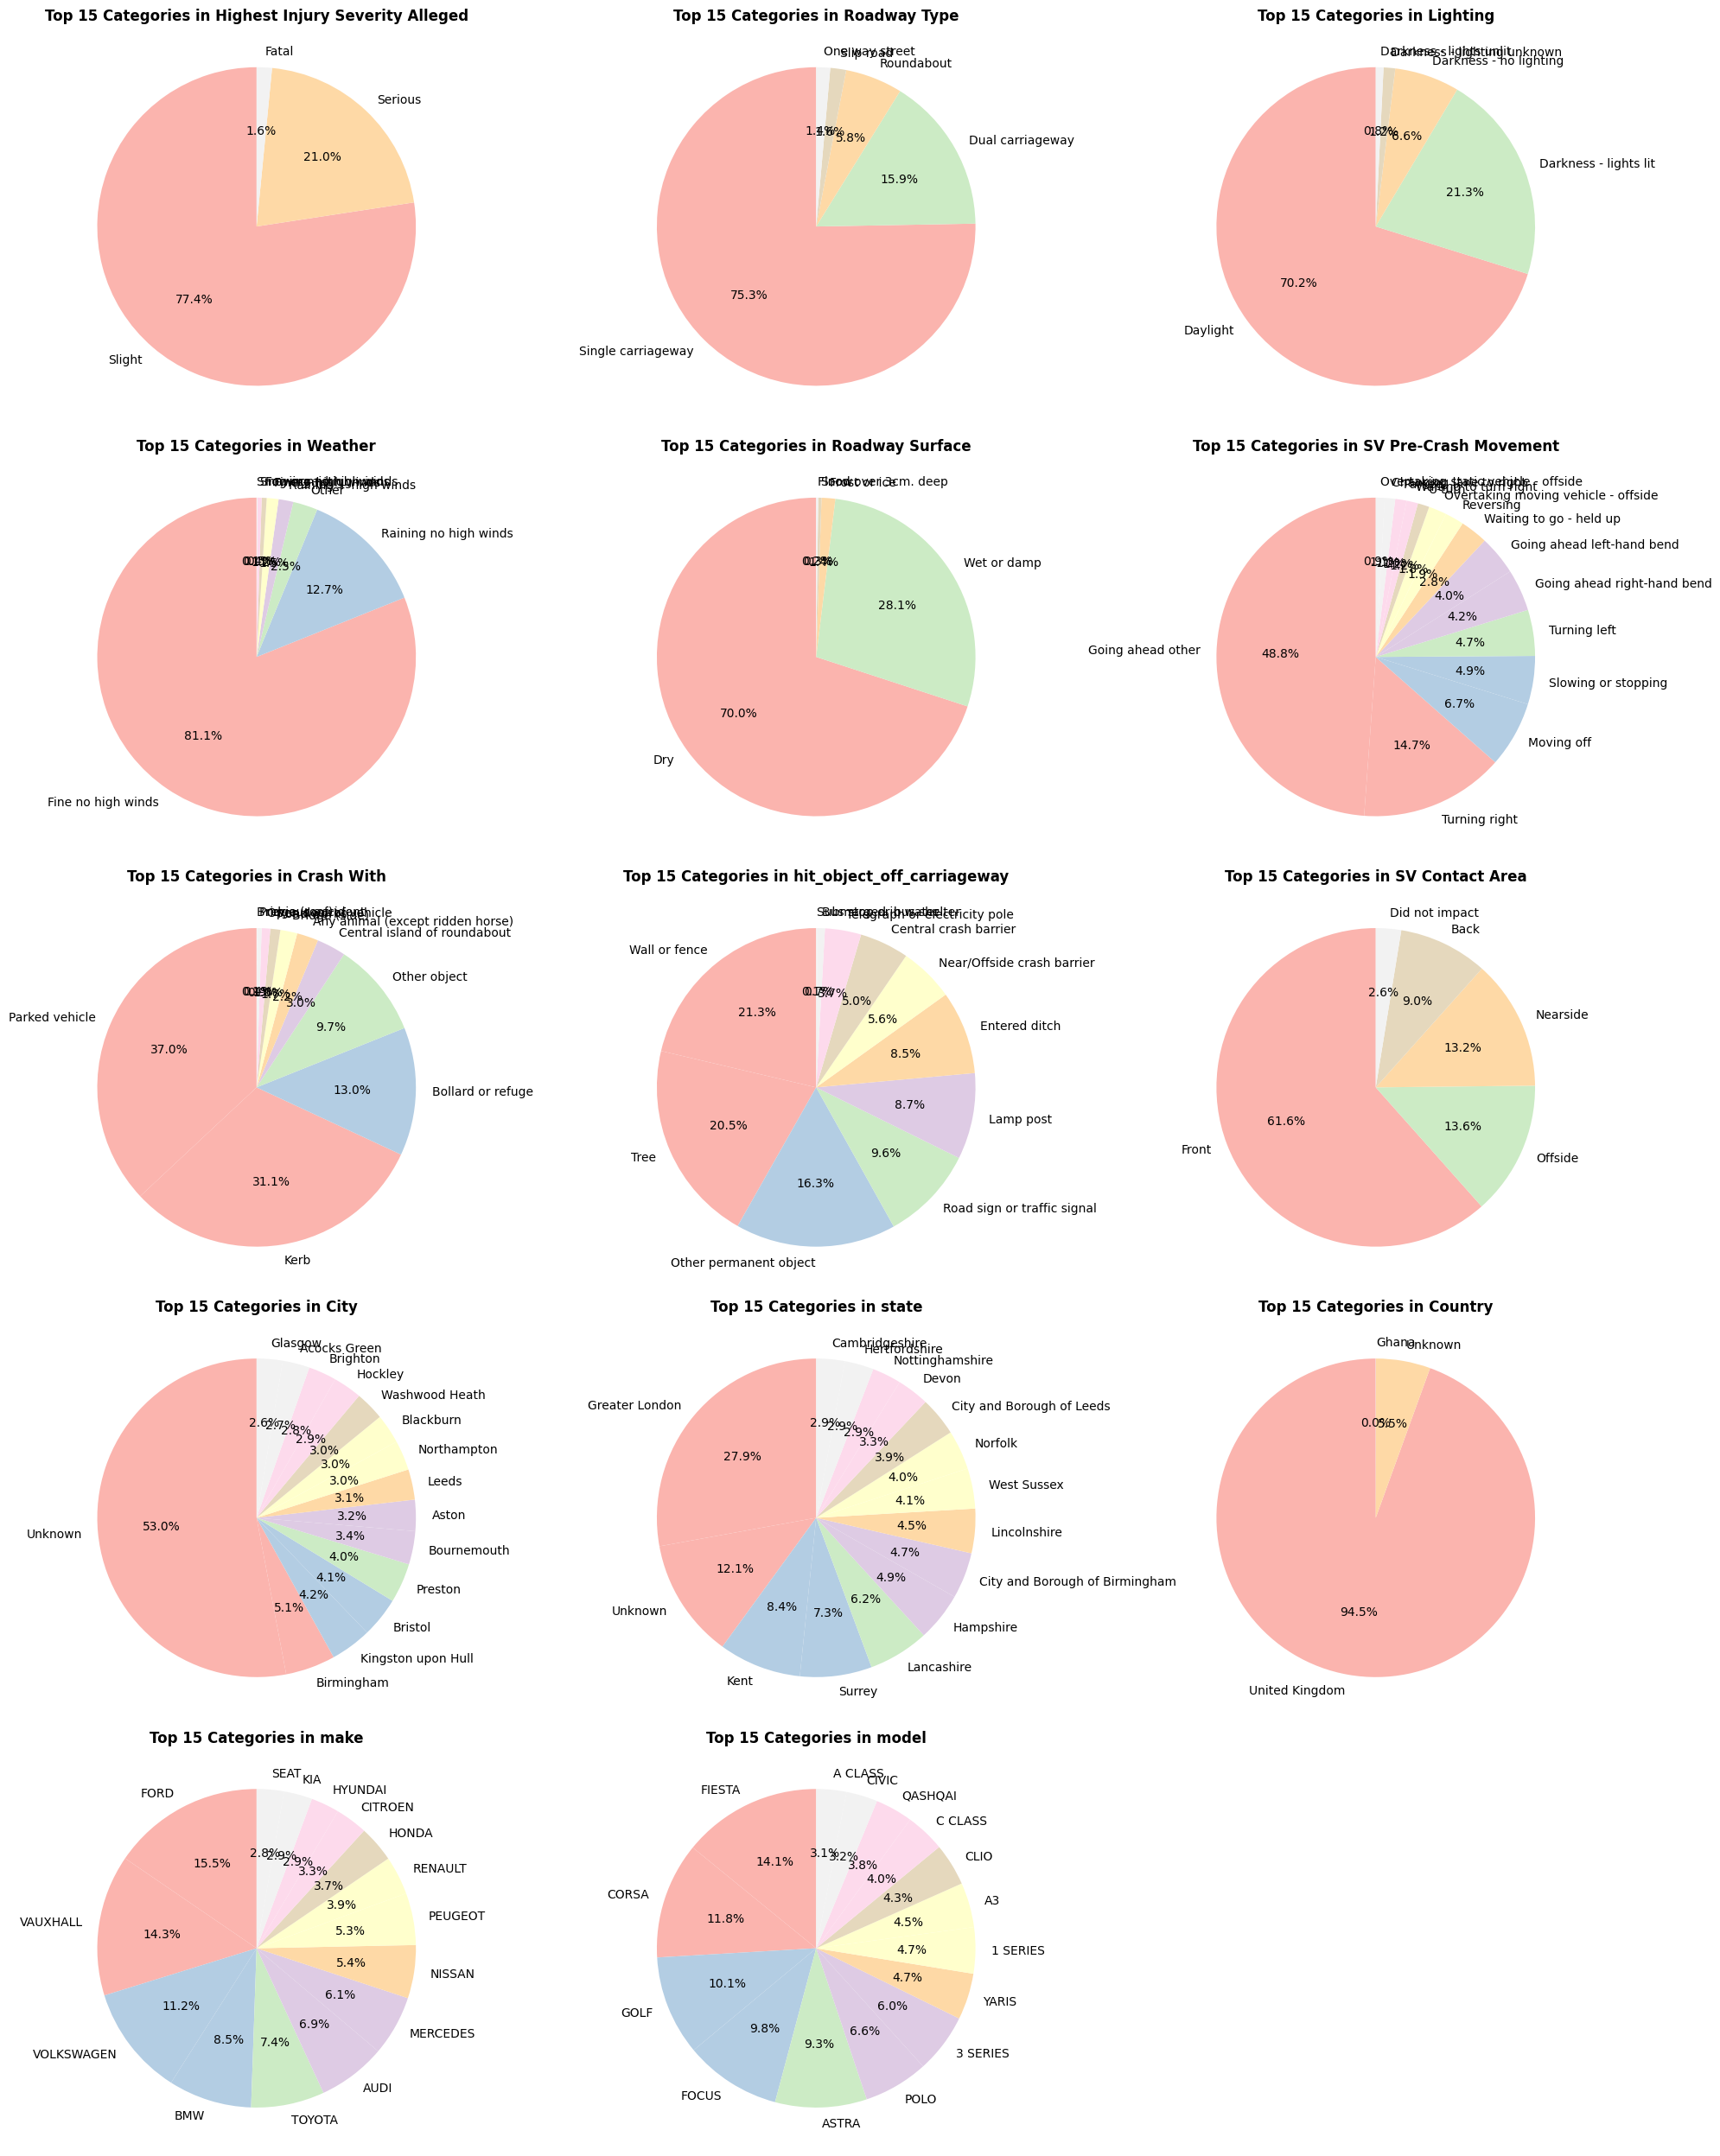

In [ ]:
# Generate pie charts for all categorical columns in a grid layout
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 40))  # 8 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(catergorical_columns):
    ax = axes[i] # reducing as too long
    data[col].value_counts().nlargest(15).plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='Pastel1', legend=False, ax=ax
    )
    ax.set_title(f'Top 15 Categories in {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('')  # Remove y-axis label for better visualization

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Histogram Distributions**

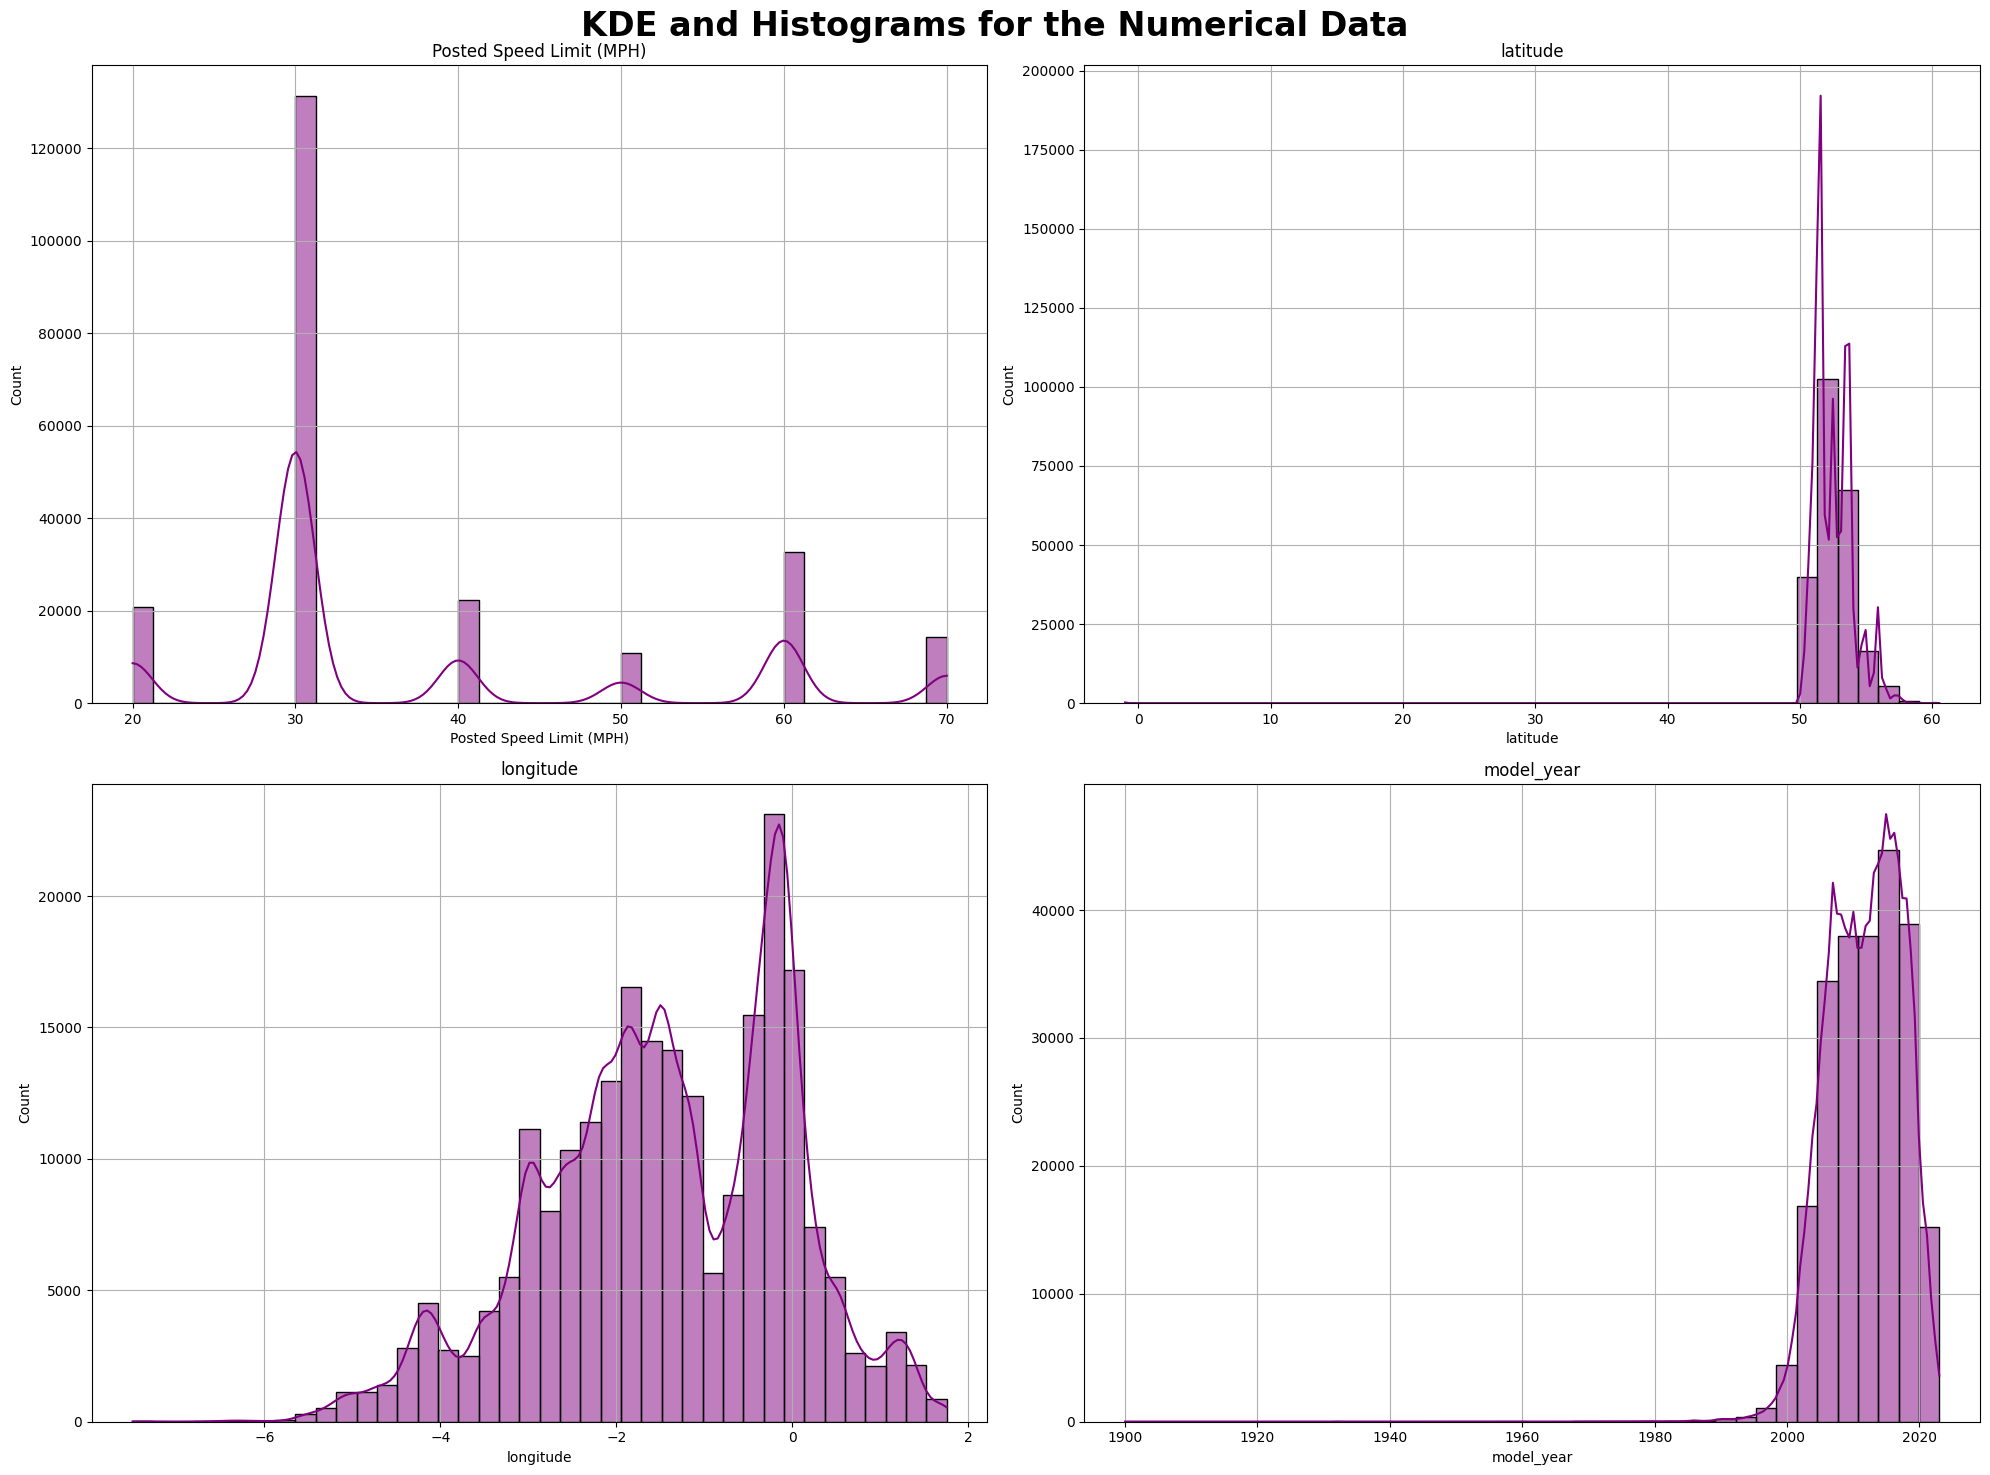

In [ ]:
# Numerical Data: KDE and Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))  # Adjusted for 4 numerical columns
axes = axes.flatten()
for i, col in enumerate(numerical_columns):  # Plot each numerical column histogram
    sns.histplot(data[col].dropna(), bins=40, kde=True, color='purple', edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)  # Add grid for better visualization

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("KDE and Histograms for the Numerical Data", fontsize=24, fontweight=800)
plt.tight_layout()
plt.show()


/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_10064/1267059573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=col, ax=axes[i], palette="viridis", order=top_categories)
/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_10064/1267059573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=col, ax=axes[i], palette="viridis", order=top_categories)
/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_10064/1267059573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countpl

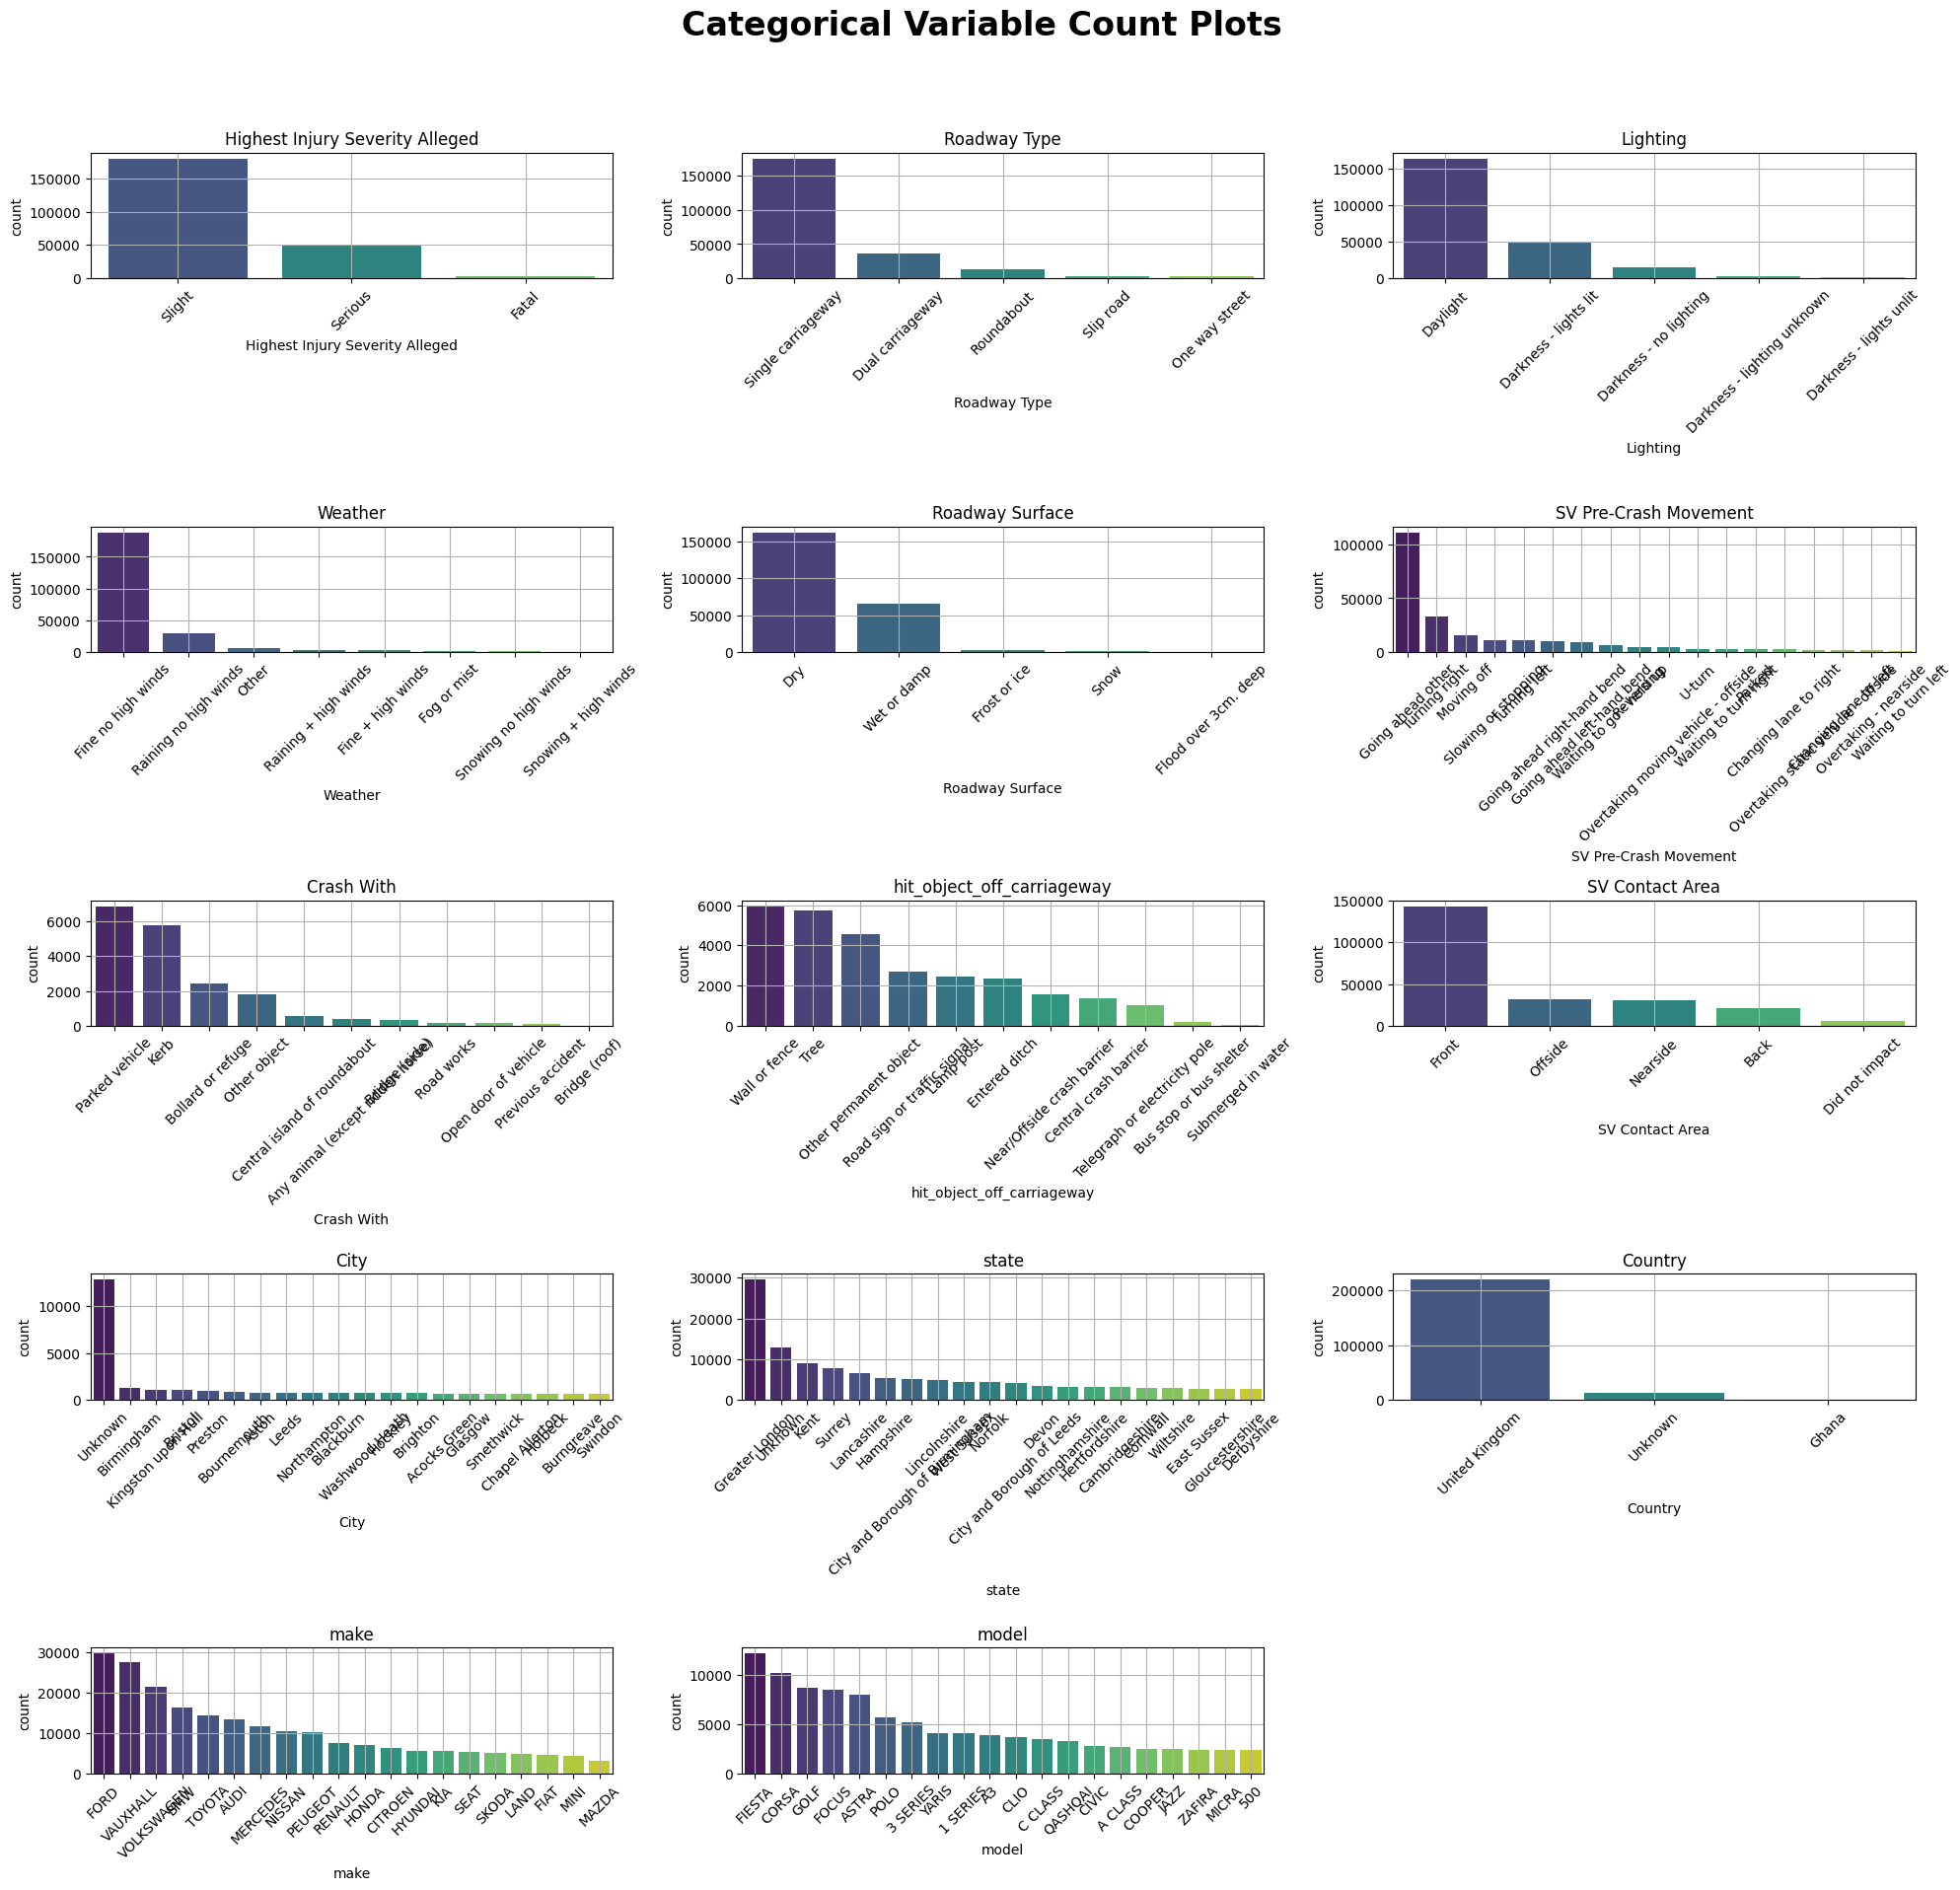

In [ ]:

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))  # 24 plots max
axes = axes.flatten()

for i, col in enumerate(catergorical_columns):
    # Limit to top N categories to speed up
    top_categories = data[col].value_counts().nlargest(20).index # had to limit to the highest as taking extremely long time
    filtered_data = data[data[col].isin(top_categories)]

    sns.countplot(data=filtered_data, x=col, ax=axes[i], palette="viridis", order=top_categories)
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Variable Count Plots", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for suptitle
plt.show()


**Time Distrubution**

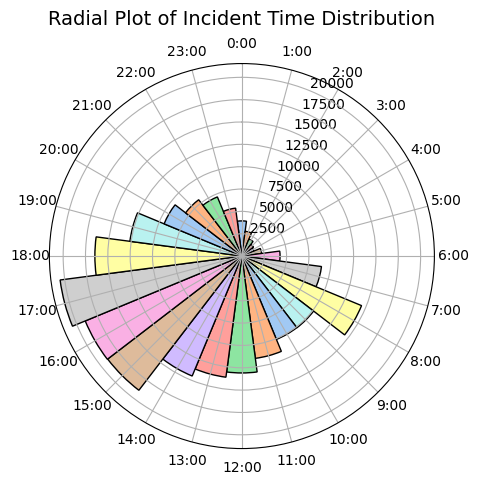

In [ ]:
# Extract hour from 'Incident Time (24:00)' and count occurrences
data['Incident Hour'] = pd.to_datetime(data['Incident Time (24:00)'], format='%H:%M:%S', errors='coerce').dt.hour
hour_counts = data['Incident Hour'].value_counts().sort_index()

# Prepare data for the radial plot
counts = hour_counts.values
hours = hour_counts.index

# Create radial plot with pastel colors and 00:00 at the top
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
theta = np.linspace(0.0, 2 * np.pi, len(hours), endpoint=False)  # Angles for each hour
bars = ax.bar(theta, counts, width=2 * np.pi / len(hours), bottom=0.0, color=sns.color_palette('pastel'), edgecolor='black')

# Adjust the orientation to make 00:00 at the top
ax.set_theta_zero_location("N")  # Set 0 degrees (00:00) to the top
ax.set_theta_direction(-1)  # Set clockwise direction

# Set labels and title
ax.set_xticks(theta)
ax.set_xticklabels([f'{hour}:00' for hour in hours])
ax.set_title('Radial Plot of Incident Time Distribution', va='bottom', fontsize=14)

plt.show()


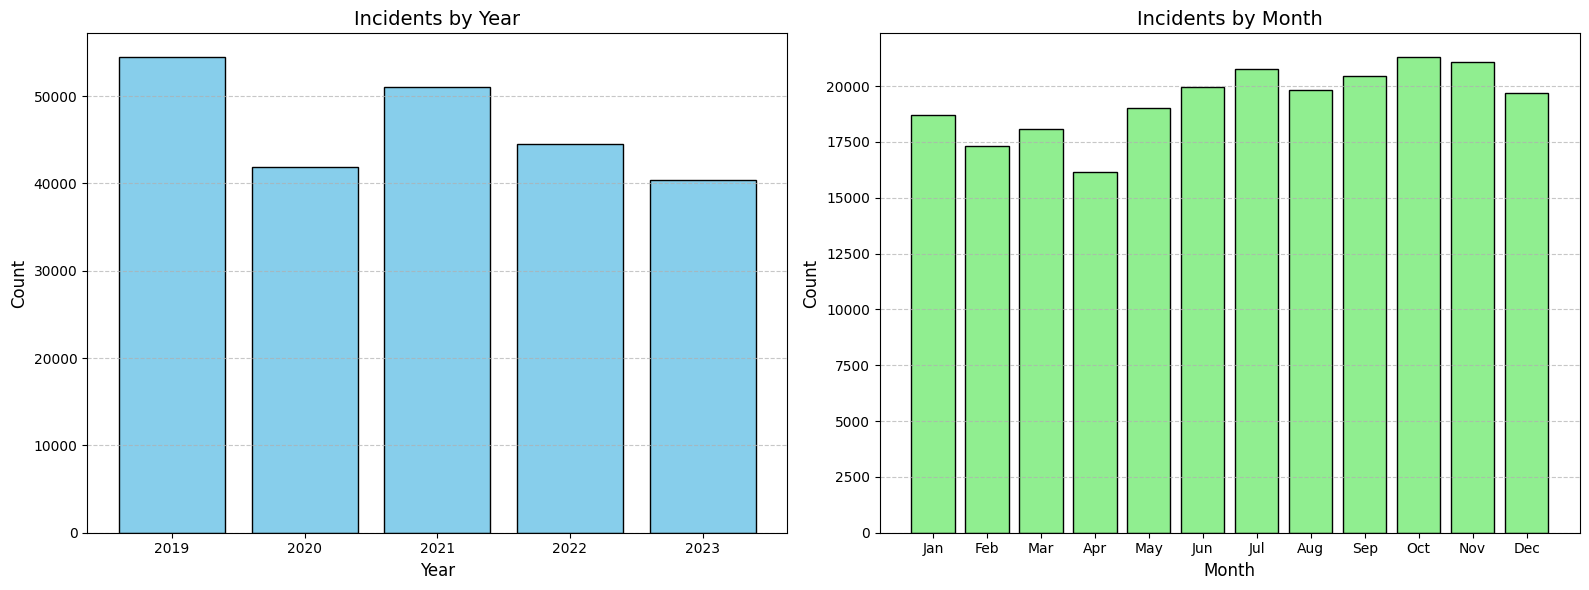

In [ ]:
# Extract year and month from the 'Incident Date' column
data['Incident Year'] = pd.to_datetime(data['Incident Date'], errors='coerce').dt.year
data['Incident Month'] = pd.to_datetime(data['Incident Date'], errors='coerce').dt.month

# Count occurrences for each year and month
year_counts = data['Incident Year'].value_counts().sort_index()
month_counts = data['Incident Month'].value_counts().sort_index()

# Plot bar charts for year and month
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar chart for years
axes[0].bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Incidents by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar chart for months
axes[1].bar(month_counts.index, month_counts.values, color='lightgreen', edgecolor='black')
axes[1].set_title('Incidents by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### **Summary**
- accidents ocurring in peak times 
- need to normalise contact area data
- A lot of unknown for severity
- more adas accidents
---

## **<span style="color:lightblue;">Bivariate Analysis</span>**

**Visualisation with Target Variable Severity**

#### **Summary**
- 
---

## **<span style="color:lightblue;">Outlier Detection</span>**

#### **Summary**
- 
---

## **<span style="color:lightblue;">Geographical Analysis</span>**

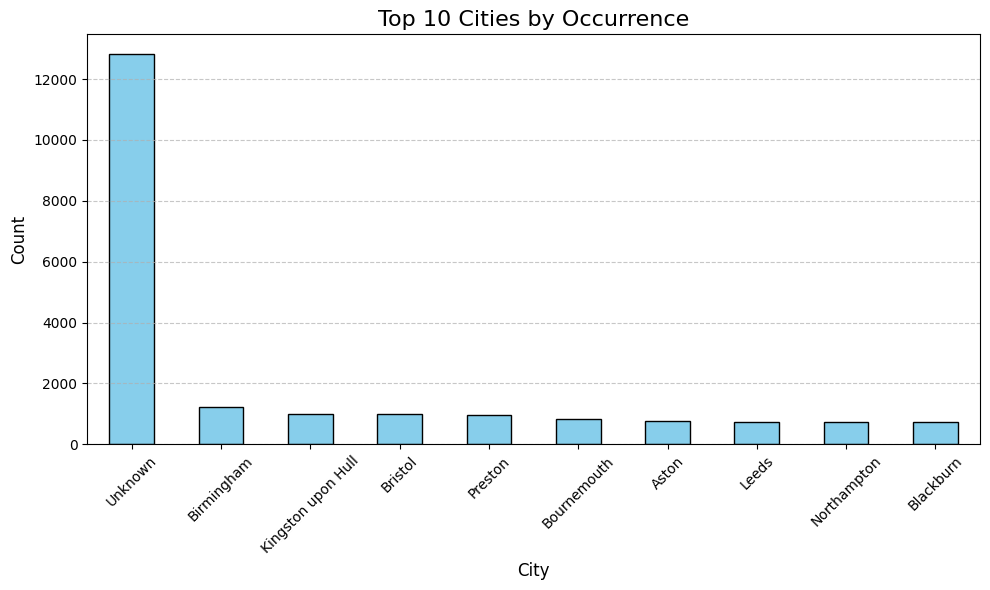

In [ ]:
# Get the top 10 cities by occurrence
top_cities = data['City'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cities by Occurrence', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**UK Map**

In [ ]:
#import folium
#from folium.plugins import HeatMap

# Calculate the center of the map
#location = data['latitude'].mean(), data['longitude'].mean()

# Create the map
#m = folium.Map(location=location, zoom_start=10)  # Adjust zoom_start for better visibility

# Add markers for each row in the dataset
#for i in range(len(data)):
   # if not pd.isna(data['latitude'].iloc[i]) and not pd.isna(data['longitude'].iloc[i]):
    #    folium.Marker([data['latitude'].iloc[i], data['longitude'].iloc[i]]).add_to(m)

# Display the map


**Boroughs in London**

#### **Summary**
- 
---

# NEXT NOTEBOOK IS NORMALISING ETC


## **<span style="color:lightblue;">Correlation Heatmaps</span>**

#### **Summary**
- 
---

## **<span style="color:lightblue;">Sampling</span>**

#### **Summary**
- 
---